In [1]:
import os
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from models import Net



In [27]:
def accuracy(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))
    return correct/total

In [2]:
#Parameters
n_epochs = 10
batch_size = 100

# Load data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = (str(i) for i in range(1,11))




net = Net()


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())




## Training
Don't run if using pretrained model

In [3]:
for epoch in range(n_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 1.787
[1,  4000] loss: 1.619
[1,  6000] loss: 1.592
[1,  8000] loss: 1.589
[1, 10000] loss: 1.576
[1, 12000] loss: 1.569
[1, 14000] loss: 1.563
[2,  2000] loss: 1.567
[2,  4000] loss: 1.561
[2,  6000] loss: 1.557
[2,  8000] loss: 1.558
[2, 10000] loss: 1.550
[2, 12000] loss: 1.552
[2, 14000] loss: 1.542
[3,  2000] loss: 1.544
[3,  4000] loss: 1.551
[3,  6000] loss: 1.541
[3,  8000] loss: 1.541
[3, 10000] loss: 1.547
[3, 12000] loss: 1.551
[3, 14000] loss: 1.546
[4,  2000] loss: 1.536
[4,  4000] loss: 1.539
[4,  6000] loss: 1.539
[4,  8000] loss: 1.538
[4, 10000] loss: 1.537
[4, 12000] loss: 1.540
[4, 14000] loss: 1.544
[5,  2000] loss: 1.546
[5,  4000] loss: 1.546
[5,  6000] loss: 1.536
[5,  8000] loss: 1.537
[5, 10000] loss: 1.527
[5, 12000] loss: 1.537
[5, 14000] loss: 1.536
[6,  2000] loss: 1.536
[6,  4000] loss: 1.530
[6,  6000] loss: 1.533
[6,  8000] loss: 1.537
[6, 10000] loss: 1.532
[6, 12000] loss: 1.524
[6, 14000] loss: 1.537
[7,  2000] loss: 1.530
[7,  4000] 

In [28]:
acc = accuracy(net, testloader)

Accuracy of the network on the 10000 test images: 93 %


In [6]:
# SAve model

PATH= 'models'

if not os.path.exists(PATH):
    os.makedirs(PATH)

torch.save(net.state_dict(), PATH+'/mnist.pt')

# load pretrained model

In [ ]:
net = NetMNIST()
pretrain_model_path = './models/mnist_100epochs.pt' 	# original model weights

net.load_state_dict(torch.load(pretrain_model_path))


In [7]:
# View weights
import matplotlib.pyplot as plt


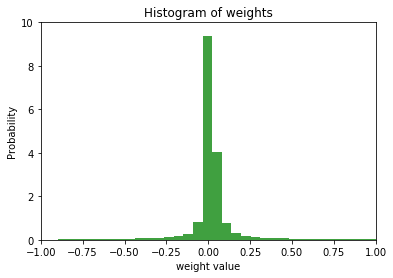

In [23]:
weights = torch.cat([w.contiguous().view(-1) for w in net.parameters()]).detach().numpy()
n, bins, patches = plt.hist(weights, 100, density=True, facecolor='g', alpha=0.75)
plt.xlabel('weight value')
plt.ylabel('Probability')
plt.title('Histogram of weights')
# xmin, xmax, ymin, ymax
plt.axis((-1, 1, 0, 10))
#plt.grid(True)
plt.show()


In [25]:
#### Quantization function
def quantize(w, level):
    return w


In [30]:
## new accuracy
for w in net.parameters():
    w = quantize(w, 4)

print( 'New accuracy: \n' )
acc = accuracy(net, testloader)

New accuracy: 

Accuracy of the network on the 10000 test images: 93 %
